In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [5]:
len(words)

32033

In [6]:
min(len(w) for w in words)

2

In [7]:
max(len(w) for w in words)

15

E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [8]:
t = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1, ch2, ch3)
        t[trigram] = t.get(trigram, 0) + 1

In [9]:
sorted(t.items(), key = lambda kv: -kv[1])

[(('a', 'h', '<E>'), 1714),
 (('n', 'a', '<E>'), 1673),
 (('a', 'n', '<E>'), 1509),
 (('o', 'n', '<E>'), 1503),
 (('<S>', 'm', 'a'), 1453),
 (('<S>', 'j', 'a'), 1255),
 (('<S>', 'k', 'a'), 1254),
 (('e', 'n', '<E>'), 1217),
 (('l', 'y', 'n'), 976),
 (('y', 'n', '<E>'), 953),
 (('a', 'r', 'i'), 950),
 (('i', 'a', '<E>'), 903),
 (('i', 'e', '<E>'), 858),
 (('a', 'n', 'n'), 825),
 (('e', 'l', 'l'), 822),
 (('a', 'n', 'a'), 804),
 (('i', 'a', 'n'), 790),
 (('m', 'a', 'r'), 776),
 (('i', 'n', '<E>'), 766),
 (('e', 'l', '<E>'), 727),
 (('y', 'a', '<E>'), 716),
 (('a', 'n', 'i'), 703),
 (('<S>', 'd', 'a'), 700),
 (('l', 'a', '<E>'), 684),
 (('e', 'r', '<E>'), 683),
 (('i', 'y', 'a'), 669),
 (('l', 'a', 'n'), 647),
 (('<S>', 'b', 'r'), 646),
 (('n', 'n', 'a'), 633),
 (('<S>', 'a', 'l'), 632),
 (('<S>', 'c', 'a'), 628),
 (('r', 'a', '<E>'), 627),
 (('n', 'i', '<E>'), 625),
 (('<S>', 'a', 'n'), 623),
 (('n', 'n', '<E>'), 619),
 (('n', 'e', '<E>'), 607),
 (('e', 'e', '<E>'), 605),
 (('e', 'y', '<

In [10]:
import torch

In [12]:
combos = 27 * 27
combos

729

In [95]:
N = torch.zeros((729, 27), dtype=torch.int32)

In [96]:
chars = sorted(list(set(''.join(words))))
s2i = {s:i+1 for i, s in enumerate(chars)}
s2i['.'] = 0
i2s = {i:s for s,i in s2i.items()}

In [97]:
s2i

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [98]:
b2i = {}
for i in range(27):
    for j in range(27):
        b2i[i2s[i]+i2s[j]] = i*27 + j
        
i2b = {i:b for b,i in b2i.items()}
i2b

{0: '..',
 1: '.a',
 2: '.b',
 3: '.c',
 4: '.d',
 5: '.e',
 6: '.f',
 7: '.g',
 8: '.h',
 9: '.i',
 10: '.j',
 11: '.k',
 12: '.l',
 13: '.m',
 14: '.n',
 15: '.o',
 16: '.p',
 17: '.q',
 18: '.r',
 19: '.s',
 20: '.t',
 21: '.u',
 22: '.v',
 23: '.w',
 24: '.x',
 25: '.y',
 26: '.z',
 27: 'a.',
 28: 'aa',
 29: 'ab',
 30: 'ac',
 31: 'ad',
 32: 'ae',
 33: 'af',
 34: 'ag',
 35: 'ah',
 36: 'ai',
 37: 'aj',
 38: 'ak',
 39: 'al',
 40: 'am',
 41: 'an',
 42: 'ao',
 43: 'ap',
 44: 'aq',
 45: 'ar',
 46: 'as',
 47: 'at',
 48: 'au',
 49: 'av',
 50: 'aw',
 51: 'ax',
 52: 'ay',
 53: 'az',
 54: 'b.',
 55: 'ba',
 56: 'bb',
 57: 'bc',
 58: 'bd',
 59: 'be',
 60: 'bf',
 61: 'bg',
 62: 'bh',
 63: 'bi',
 64: 'bj',
 65: 'bk',
 66: 'bl',
 67: 'bm',
 68: 'bn',
 69: 'bo',
 70: 'bp',
 71: 'bq',
 72: 'br',
 73: 'bs',
 74: 'bt',
 75: 'bu',
 76: 'bv',
 77: 'bw',
 78: 'bx',
 79: 'by',
 80: 'bz',
 81: 'c.',
 82: 'ca',
 83: 'cb',
 84: 'cc',
 85: 'cd',
 86: 'ce',
 87: 'cf',
 88: 'cg',
 89: 'ch',
 90: 'ci',
 91: 'cj'

In [99]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix12 = b2i[ch1+ch2]
        ix2 = s2i[ch2]
        ix3 = s2i[ch3]
        N[ix12, ix3] += 1
        if(s2i[ch1] == 0):
            ixstart = b2i[ch1+ch1]
            N[ixstart, ix2] += 1
N[0,1].item()

4410

In [100]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

(-0.5, 26.5, 728.5, -0.5)

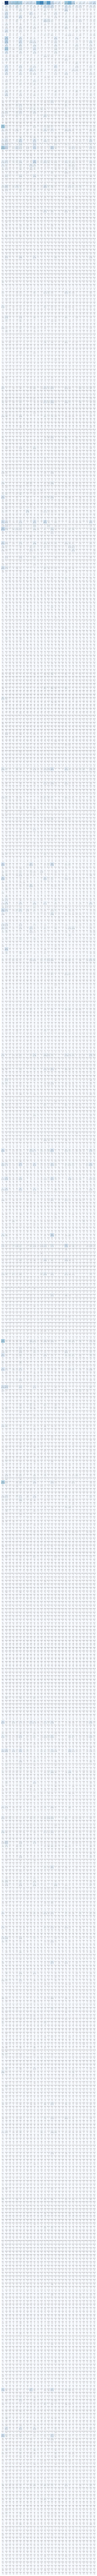

In [101]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(48,320))
plt.imshow(N, cmap='Blues')
for i in range(combos):
        for j in range(27):
            chstr = i2b[i] + i2s[j]
            plt.text(j,i, chstr, ha="center", va="bottom", color="gray")
            plt.text(j,i, N[i,j].item(), ha="center", va="top", color="gray")

plt.axis('off')

In [104]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [105]:
p = N[1].float()
p = p / p.sum()
p

tensor([0.0000, 0.0469, 0.0431, 0.0070, 0.0830, 0.0125, 0.0048, 0.0039, 0.0206,
        0.0349, 0.0061, 0.0170, 0.1433, 0.0871, 0.1413, 0.0023, 0.0039, 0.0020,
        0.1093, 0.0440, 0.0163, 0.0345, 0.0551, 0.0014, 0.0061, 0.0392, 0.0345])

In [106]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
i2s[ix]

'r'

In [107]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [108]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [109]:
P = N.float()

In [110]:
P.sum(1, keepdim=True).shape

torch.Size([729, 1])

In [47]:
# 27, 27
# 27, 1

In [111]:
# Model Smoothing: Adding +1 to N ensures no bigram has log-likelihood of -Infinity
P = (N+1).float()
P /= P.sum(1, keepdims=True)
P[1]

# F = torch.zeros((26, 1), dtype=torch.int32)
# for i in range(1, 27):
#     print(N[i])
#     F[i-1] = N[i].sum()
# print(F)
# F = F.float()
# F /= F.sum(0, keepdims=True)
# F
# P[:,0]

tensor([0.0002, 0.0469, 0.0430, 0.0072, 0.0827, 0.0126, 0.0050, 0.0041, 0.0207,
        0.0349, 0.0063, 0.0171, 0.1427, 0.0868, 0.1406, 0.0025, 0.0041, 0.0023,
        0.1089, 0.0439, 0.0165, 0.0345, 0.0550, 0.0016, 0.0063, 0.0392, 0.0345])

In [115]:
g = torch.Generator().manual_seed(2147483647)

for i in range(30):

    out = ['.']
    bx = 0
    ix = 0
    while True:
#         p = N[ix].float()
#         p = p / p.sum()
#         p = torch.ones(27) / 27
        p = P[bx]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        
        out.append(i2s[ix])
        bigram = ''.join(out[-2:])
        bx = b2i[bigram]
        if ix == 0:
            break
    print(''.join(out))

.miq.
.axx.
.mereyannyaar.
.knooraen.
.el.
.marviovania.
.odarimalabelon.
.hamirelslen.
.elyn.
.rae.
.bra.
.ceevlainacelonikaireil.
.bech.
.amilleia.
.trutandennimsaby.
.crewina.
.lanoxvkyrina.
.khine.
.trise.
.koberseberryslot.
.ston.
.absdgcoraf.
.halinaelilik.
.khanv.
.erylo.
.zaehali.
.kayzlynnsondret.
.tasmaanourintin.
.midanleedes.
.denia.


In [116]:
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix12 = b2i[ch1+ch2]
        ix3 = s2i[ch3]
        prob = P[ix12, ix3]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n +=1
#         print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-410414.9688)
nll=tensor(410414.9688)
2.092747449874878


In [26]:
# Creating the training set of bigrams
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s2i[ch1]
        ix2 = s2i[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [27]:
xs

tensor([ 0,  5, 13, 13,  1])

In [28]:
ys

tensor([ 5, 13, 13,  1,  0])

In [29]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
xenc.shape

torch.Size([5, 27])

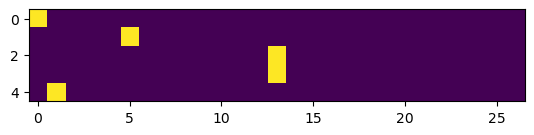

In [31]:
plt.imshow(xenc)

In [32]:
xenc.dtype

torch.float32

In [33]:
W = torch.randn((27,27))
W.shape
xenc @ W

tensor([[-1.9502e-01, -3.0627e-01,  7.7286e-01,  3.6339e-02,  1.7706e-01,
         -1.4266e+00,  2.1915e+00, -1.5962e-01, -5.9643e-01, -5.5171e-01,
          2.9448e+00, -8.4780e-02, -2.9407e+00,  1.3245e-01, -7.9980e-01,
          8.0458e-01, -4.4998e-01, -5.9029e-01, -4.5990e-01,  5.5757e-01,
          3.3278e-01, -1.6950e+00,  3.3236e-01, -9.1419e-01,  1.5541e+00,
          7.5375e-01,  4.8473e-01],
        [ 1.2008e+00, -7.1946e-01, -5.1056e-01, -4.3253e-01,  9.2531e-02,
         -8.2139e-01,  2.3110e-01,  6.7618e-01, -1.0897e-01,  1.4927e-02,
         -9.1560e-01,  5.8067e-01,  1.6384e+00,  5.9792e-01, -5.6334e-01,
          1.5920e+00, -7.8966e-02, -8.7389e-01, -2.3602e-02,  1.2755e-01,
         -3.3167e-01,  1.0851e+00,  6.8057e-02, -2.1236e-01, -4.1895e-01,
          5.1759e-01, -4.2032e-01],
        [-1.0498e+00,  5.2822e-03,  9.2897e-01,  1.9571e+00, -2.8352e-01,
          2.0947e-01,  3.5483e-01, -2.5811e-01,  1.3388e-01,  1.7661e+00,
         -1.4989e+00,  7.6519e-01, -8.39

In [34]:
(xenc @ W)[3, 13]

tensor(-0.1955)

In [35]:
(xenc @ W).exp()

tensor([[ 0.8228,  0.7362,  2.1660,  1.0370,  1.1937,  0.2401,  8.9489,  0.8525,
          0.5508,  0.5760, 19.0077,  0.9187,  0.0528,  1.1416,  0.4494,  2.2358,
          0.6376,  0.5542,  0.6313,  1.7464,  1.3948,  0.1836,  1.3942,  0.4008,
          4.7310,  2.1250,  1.6237],
        [ 3.3227,  0.4870,  0.6002,  0.6489,  1.0969,  0.4398,  1.2600,  1.9664,
          0.8968,  1.0150,  0.4003,  1.7872,  5.1471,  1.8183,  0.5693,  4.9134,
          0.9241,  0.4173,  0.9767,  1.1360,  0.7177,  2.9596,  1.0704,  0.8087,
          0.6577,  1.6780,  0.6568],
        [ 0.3500,  1.0053,  2.5319,  7.0790,  0.7531,  1.2330,  1.4259,  0.7725,
          1.1433,  5.8482,  0.2234,  2.1494,  0.9195,  0.8224,  0.7103,  6.5070,
          4.5390,  1.6083,  1.4751,  1.5704,  2.2367,  0.8102,  0.6897,  1.0011,
          1.2424,  1.2440,  3.0280],
        [ 0.3500,  1.0053,  2.5319,  7.0790,  0.7531,  1.2330,  1.4259,  0.7725,
          1.1433,  5.8482,  0.2234,  2.1494,  0.9195,  0.8224,  0.7103,  6.5070

In [36]:
# probs below essentially is the single layer neural net that determines the probability distribution of the next most 
# likely character given one of the characters in ".emma"

logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N array of counts
probs = counts / counts.sum(1, keepdims=True) # normalize
# 2 steps above are collectively called "softmax" function: exponentiate (e^x) to get "counts", then normalize
# results in a probability distribution
probs

tensor([[0.0146, 0.0131, 0.0384, 0.0184, 0.0212, 0.0043, 0.1588, 0.0151, 0.0098,
         0.0102, 0.3373, 0.0163, 0.0009, 0.0203, 0.0080, 0.0397, 0.0113, 0.0098,
         0.0112, 0.0310, 0.0248, 0.0033, 0.0247, 0.0071, 0.0840, 0.0377, 0.0288],
        [0.0866, 0.0127, 0.0156, 0.0169, 0.0286, 0.0115, 0.0328, 0.0512, 0.0234,
         0.0265, 0.0104, 0.0466, 0.1341, 0.0474, 0.0148, 0.1280, 0.0241, 0.0109,
         0.0255, 0.0296, 0.0187, 0.0771, 0.0279, 0.0211, 0.0171, 0.0437, 0.0171],
        [0.0066, 0.0190, 0.0478, 0.1338, 0.0142, 0.0233, 0.0269, 0.0146, 0.0216,
         0.1105, 0.0042, 0.0406, 0.0174, 0.0155, 0.0134, 0.1230, 0.0858, 0.0304,
         0.0279, 0.0297, 0.0423, 0.0153, 0.0130, 0.0189, 0.0235, 0.0235, 0.0572],
        [0.0066, 0.0190, 0.0478, 0.1338, 0.0142, 0.0233, 0.0269, 0.0146, 0.0216,
         0.1105, 0.0042, 0.0406, 0.0174, 0.0155, 0.0134, 0.1230, 0.0858, 0.0304,
         0.0279, 0.0297, 0.0423, 0.0153, 0.0130, 0.0189, 0.0235, 0.0235, 0.0572],
        [0.0175, 0.0159,

In [37]:
probs.shape

torch.Size([5, 27])

In [38]:
probs[0].sum()

tensor(1.)

In [39]:
nlls = torch.zeros(5)
for i in range(5):
    #i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('______________')
    print(f'bigram example {i+1}: {i2s[x]}{i2s[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character', p.item())
    logp = torch.log(p)
    print('log likelihood, logp.item()')
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
    
print('=============')
print('average negative log likelihood, i.e. loss=', nlls.mean().item())
    

______________
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0146, 0.0131, 0.0384, 0.0184, 0.0212, 0.0043, 0.1588, 0.0151, 0.0098,
        0.0102, 0.3373, 0.0163, 0.0009, 0.0203, 0.0080, 0.0397, 0.0113, 0.0098,
        0.0112, 0.0310, 0.0248, 0.0033, 0.0247, 0.0071, 0.0840, 0.0377, 0.0288])
label (actual next character): 5
probability assigned by the net to the correct character 0.004261229652911425
log likelihood, logp.item()
negative log likelihood: 5.458197593688965
______________
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0866, 0.0127, 0.0156, 0.0169, 0.0286, 0.0115, 0.0328, 0.0512, 0.0234,
        0.0265, 0.0104, 0.0466, 0.1341, 0.0474, 0.0148, 0.1280, 0.0241, 0.0109,
        0.0255, 0.0296, 0.0187, 0.0771, 0.0279, 0.0211, 0.0171, 0.0437, 0.0171])
label (actual next character): 13
probability assigned by the net to the correct character 0.04

In [40]:
# optimization

In [41]:
xs

tensor([ 0,  5, 13, 13,  1])

In [42]:
ys

tensor([ 5, 13, 13,  1,  0])

In [43]:
# random init 27 neurons weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [44]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [45]:
loss.item()

3.7693049907684326

In [46]:
# backward pass
W.grad = None # set gradient to zero on all weights
loss.backward()

In [47]:
W.data += -0.1 * W.grad

In [48]:
# optimization but with all setup and running code organized into two cells

In [49]:
# create the dataset
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s2i[ch1]
        ix2 = s2i[ch2]
#         print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [50]:
# gradient descent
for k in range(100):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() 
#     version below adds a regularization term that pushes the values of W toward zero, while first term pushes values to
# approximate the probabilities of the bigram set
#     loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())
    
    # backward pass
    W.grad = None # set gradient to zero on all weights
    loss.backward()
    
    # update
    W.data += -50 * W.grad

3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097293376922607
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277292251587
2.6253881454467773
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.5178580284118652
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.504261016845703
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129
